# Summer School on Data Science Tools and Techniques in Modelling Complex Networks

### [Bogumił Kamiński](http://bogumilkaminski.pl/about/)

## Working with graph data using Julia Language
### Day 2, Tuesday, August 20th, 2019, 13:00 to 16:00

## Erdős–Rényi model

In [1]:
using Pkg
Pkg.activate(".")
using LightGraphs, Distributions, GraphPlot, PyPlot, Statistics, DataFrames

In [2]:
function ER_dense(n, p)
    g = SimpleGraph(n)
    for i in 1:n, j in i+1:n
        rand() < p && add_edge!(g, i, j)
    end
    g
end

ER_dense (generic function with 1 method)

In [3]:
g1 = ER_dense(10, 0.5)

{10, 26} undirected simple Int64 graph

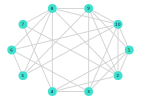

In [4]:
gplot(g1, nodelabel=1:10, layout=circular_layout)

In [5]:
collect(edges(g1))

26-element Array{LightGraphs.SimpleGraphs.SimpleEdge{Int64},1}:
 Edge 1 => 2 
 Edge 1 => 3 
 Edge 1 => 4 
 Edge 1 => 9 
 Edge 1 => 10
 Edge 2 => 4 
 Edge 2 => 7 
 Edge 2 => 8 
 ⋮           
 Edge 5 => 10
 Edge 6 => 8 
 Edge 6 => 10
 Edge 7 => 8 
 Edge 8 => 9 
 Edge 8 => 10
 Edge 9 => 10

In [6]:
function ER_sparse(n, p)
    g = SimpleGraph(n)
    m = rand(Binomial(div(n*(n-1), 2), p))
    while ne(g) < m
        i, j = rand(1:n), rand(1:n)
        i != j && add_edge!(g, i, j)
    end
    g
end

ER_sparse (generic function with 1 method)

In [7]:
g2 = ER_sparse(10, 0.5)

{10, 24} undirected simple Int64 graph

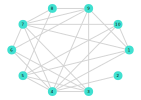

In [8]:
gplot(g2, nodelabel=1:10, layout=circular_layout)

In [9]:
collect(edges(g2))

24-element Array{LightGraphs.SimpleGraphs.SimpleEdge{Int64},1}:
 Edge 1 => 4 
 Edge 1 => 5 
 Edge 1 => 7 
 Edge 1 => 9 
 Edge 1 => 10
 Edge 2 => 4 
 Edge 3 => 4 
 Edge 3 => 5 
 ⋮           
 Edge 5 => 10
 Edge 6 => 7 
 Edge 6 => 9 
 Edge 7 => 8 
 Edge 7 => 9 
 Edge 7 => 10
 Edge 8 => 9 

In [10]:
for p in (0.001, 0.01, 0.1)
    println("p = $p")
    @time ER_dense(10000, p)
    @time ER_sparse(10000, p)
end

p = 0.001
  0.138291 seconds (36.49 k allocations: 3.002 MiB)
  0.011494 seconds (37.38 k allocations: 3.160 MiB)
p = 0.01
  0.194725 seconds (70.04 k allocations: 21.662 MiB, 4.74% gc time)
  0.209569 seconds (70.14 k allocations: 21.869 MiB, 3.09% gc time)
p = 0.1
  1.065901 seconds (102.03 k allocations: 191.937 MiB, 13.35% gc time)
  6.049452 seconds (103.23 k allocations: 210.697 MiB, 3.83% gc time)


## Mean degree analysis

In [11]:
er_mean_degree = DataFrame(n=Int[], d=Float64[], sample_d=Float64[])

,n,d,sample_d
,Int64,Float64,Float64


In [12]:
d = 2
for n in [10, 100, 1000, 10000],
    reps in 1:1000
    push!(er_mean_degree, (n, d, mean(degree(erdos_renyi(n, 2/n)))))
end
er_mean_degree

,n,d,sample_d
,Int64,Float64,Float64
1,10,2.0,1.0
2,10,2.0,1.4
3,10,2.0,2.0
4,10,2.0,2.2
5,10,2.0,1.8
6,10,2.0,1.6
7,10,2.0,2.6
8,10,2.0,1.6
9,10,2.0,1.0


In [13]:
res = by(er_mean_degree, [:n, :d], mean_degree=:sample_d=>mean, std_degree=:sample_d=>std)

,n,d,mean_degree,std_degree
,Int64,Float64,Float64,Float64
1,10,2.0,1.7936,0.531264
2,100,2.0,1.9662,0.19589
3,1000,2.0,1.9979,0.0619665
4,10000,2.0,1.99969,0.0201503


In [14]:
res.th_degree = @. 2 * binomial.(res.n, 2) * res.d / res.n^2
res

,n,d,mean_degree,std_degree,th_degree
,Int64,Float64,Float64,Float64,Float64
1,10,2.0,1.7936,0.531264,1.8
2,100,2.0,1.9662,0.19589,1.98
3,1000,2.0,1.9979,0.0619665,1.998
4,10000,2.0,1.99969,0.0201503,1.9998


## Giant component

In [15]:
largest_component(n, d) =
    maximum(length.(connected_components(erdos_renyi(n, d/n)))) / n

largest_component (generic function with 1 method)

In [16]:
lc_df_10k = DataFrame(d=Float64[], largest=Float64[])

,d,largest
,Float64,Float64


In [17]:
for d in 0.8:0.01:2.0,
    reps in 1:32
    push!(lc_df_10k, (d, largest_component(10000, d)))
end
lc_df_10k

,d,largest
,Float64,Float64
1,0.8,0.0083
2,0.8,0.0031
3,0.8,0.0048
4,0.8,0.0074
5,0.8,0.0107
6,0.8,0.0051
7,0.8,0.0055
8,0.8,0.0087
9,0.8,0.0083


In [18]:
res = by(lc_df_10k, :d, mean_largest=:largest=>mean, std_largest=:largest=>std)

,d,mean_largest,std_largest
,Float64,Float64,Float64
1,0.8,0.0070625,0.00201458
2,0.81,0.00740938,0.00290654
3,0.82,0.0090125,0.00435607
4,0.83,0.00849375,0.00346633
5,0.84,0.00880313,0.00393893
6,0.85,0.00942187,0.00382097
7,0.86,0.0097375,0.00302716
8,0.87,0.0120344,0.00499068
9,0.88,0.0113844,0.00344488


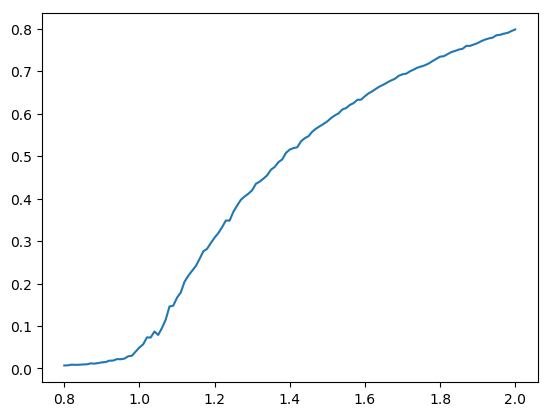

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000001F14128>

In [19]:
plot(res.d, res.mean_largest)

In [20]:
df_largest_n = DataFrame(n=Int[], d=Float64[], largest=Float64[])

,n,d,largest
,Int64,Float64,Float64


In [21]:
for d in [0.9, 1.0, 1.1, 1.2],
    n in [2^i for i in 8:16],
    reps in 1:64
    push!(df_largest_n, (n, d, largest_component(n, d)))
end
df_largest_n

,n,d,largest
,Int64,Float64,Float64
1,256,0.9,0.1875
2,256,0.9,0.0546875
3,256,0.9,0.0703125
4,256,0.9,0.0585938
5,256,0.9,0.0546875
6,256,0.9,0.0625
7,256,0.9,0.175781
8,256,0.9,0.25
9,256,0.9,0.0703125


In [22]:
res = groupby(by(df_largest_n, [:n, :d], m=:largest=>mean), :d)

,n,d,m
,Int64,Float64,Float64
1,256,0.9,0.100586
2,512,0.9,0.0708618
3,1024,0.9,0.0516052
4,2048,0.9,0.0339737
5,4096,0.9,0.023777
6,8192,0.9,0.0152111
7,16384,0.9,0.0105209
8,32768,0.9,0.00636292
9,65536,0.9,0.00384164


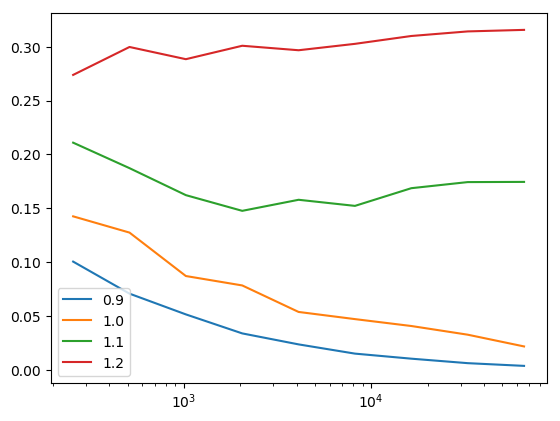

In [23]:
for sdf in res
    plot(sdf.n, sdf.m)
end
legend([sdf.d[1] for sdf in res])
plt.xscale("log")